# Assignment 1 SoC: Shridhar Patil

We first implement the circuit and test for all 4 cases. Suppose Alice and Bob both have a qubit of the pair bell state (|00> + |11>)/sqrt(2). Alice applies some gates according to the bits she wants to send and sends this qubit over to Bob who applies the below implented circuits and measures outcomes to see bits Alice had to send. 

We want to test to see if the 4 possible states Bob has give the correct cooresponding bits Alice wanted to send.



$$
\begin{array}{|c|c|c|}
\hline
\textbf{Bits to send} & \textbf{Gates Alice Applies on her Qubit} & \textbf{Final Quantum State} \\
\hline
00 & I & \frac{\ket{00} + \ket{11}}{\sqrt{2}} \\
\hline
01 & Z & \frac{\ket{00} - \ket{11}}{\sqrt{2}} \\
\hline
10 & X & \frac{\ket{10} + \ket{01}}{\sqrt{2}} \\
\hline
11 & iY & \frac{\ket{01} - \ket{10}}{\sqrt{2}} \\
\hline
\end{array}
$$

**Table: Sequence of Gates in Superdense Coding**


In [1]:
from qiskit.quantum_info import Statevector

from qiskit import QuantumCircuit

from qiskit.visualization import array_to_latex

state_00 = Statevector.from_int(0,2**2) #creates state |00>
state_01 = Statevector.from_int(1,2**2)
state_10 = Statevector.from_int(2,2**2)
state_11 = Statevector.from_int(3,2**2)


bell_circuit = QuantumCircuit(2)

bell_circuit.h(0)

bell_circuit.cx(0,1)

bell_state_00 = state_00.evolve(bell_circuit)
bell_state_01 = state_01.evolve(bell_circuit)
bell_state_10 = state_10.evolve(bell_circuit)
bell_state_11 = state_11.evolve(bell_circuit)

from qiskit.visualization import array_to_latex

display(array_to_latex(bell_state_00.data))
display(array_to_latex(bell_state_01.data))
display(array_to_latex(bell_state_10.data))
display(array_to_latex(bell_state_11.data))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

The 4 possible states Bob can recieve in superdense coding are prepared with basis |00> , |01> , |10>, |11>. We now check the circuit Bob has to see if he can retrieve the bits. 

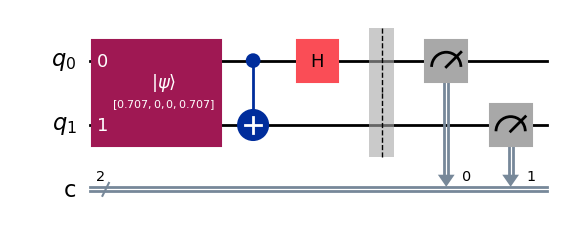

In [ ]:
superdense_circuit = QuantumCircuit(2,2) 

superdense_circuit.initialize(bell_state_00.data, [0, 1])  #Suppose Bob recieved state 00

superdense_circuit.cx(0,1)

superdense_circuit.h(0)

superdense_circuit.barrier(range(2))

superdense_circuit.measure(range(2), range(2))

superdense_circuit.draw('mpl')

This is Bobs circuit to identify the states

In [3]:
from qiskit import transpile 

from qiskit_aer import AerSimulator 

backend = AerSimulator()

superdense_circuit_transpiled = transpile(superdense_circuit, backend) #transpile the circuit according to AerSimulator backend simulator

job_sim = backend.run(superdense_circuit_transpiled, shots = 1024)

result_sim = job_sim.result()

count = result_sim.get_counts(superdense_circuit_transpiled) 

print(count)

{'00': 1024}


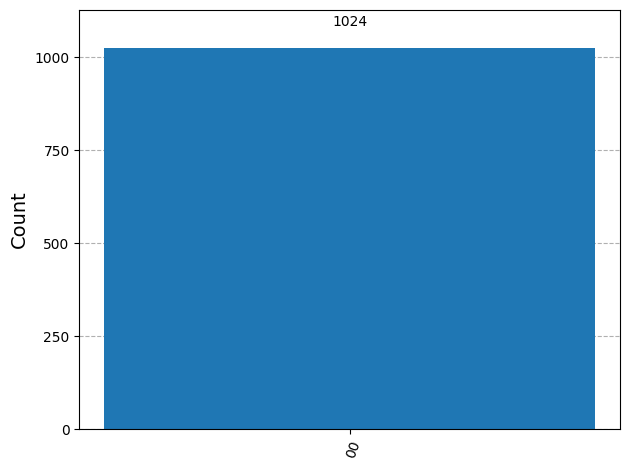

In [4]:
from qiskit.visualization import plot_histogram
plot_histogram(count)

We see, as expected, since Bob has the 00 bell state (As Alice did nothing as she wanted to transmit 00), we get a full observation of 00 (ideally). We can check with other states as well:


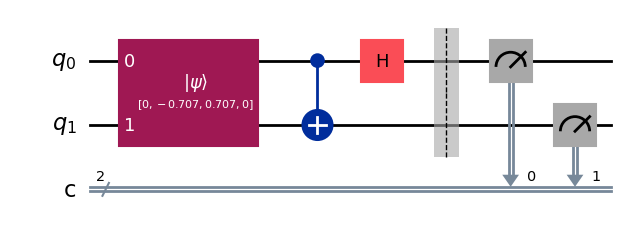

In [ ]:
superdense_circuit = QuantumCircuit(2,2) 

superdense_circuit.initialize(bell_state_11.data, [0, 1])  #Initialised to 11 bell state when alice has to transmit 11

superdense_circuit.cx(0,1)

superdense_circuit.h(0)

superdense_circuit.barrier(range(2))

superdense_circuit.measure(range(2), range(2))

superdense_circuit.draw('mpl')

In [6]:
from qiskit import transpile 

from qiskit_aer import AerSimulator 

backend = AerSimulator()

superdense_circuit_transpiled = transpile(superdense_circuit, backend) #transpile the circuit according to AerSimulator backend simulator

job_sim = backend.run(superdense_circuit_transpiled, shots = 1024)

result_sim = job_sim.result()

count = result_sim.get_counts(superdense_circuit_transpiled) 

print(count)

{'11': 1024}


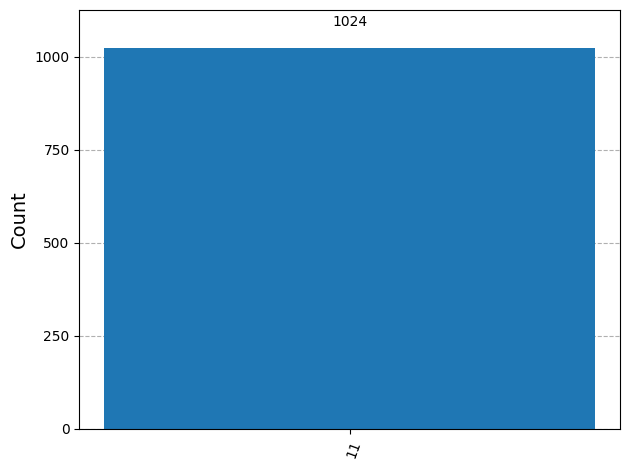

In [7]:
from qiskit.visualization import plot_histogram
plot_histogram(count)

As expected. We have checked the validity of our circuit for the 4 input states.

## Real Quantum Hardware:

In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()

print(service.backends)

backend = service.least_busy(operational = True, min_num_qubits=2)

print(f"Name of assigned system: {backend.name}")

C:\Users\shrid\AppData\Local\Temp\ipykernel_39676\3294505545.py:3: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService()


<bound method QiskitRuntimeService.backends of <QiskitRuntimeService>>
Name of assigned system: ibm_sherbrooke


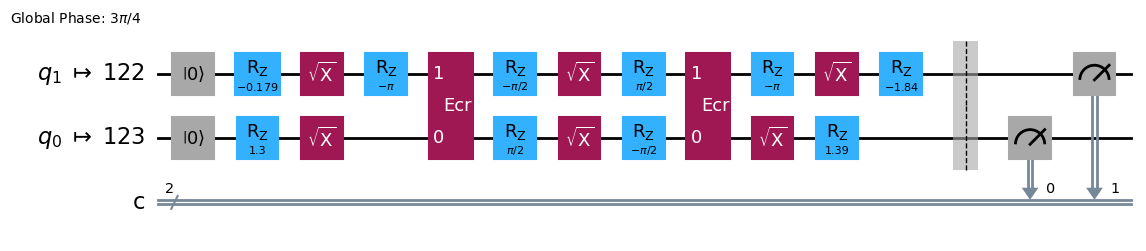

In [9]:
superdense_circuit_transpiled = transpile(superdense_circuit, backend, optimization_level= 2) #transpiled according to our connected system

superdense_circuit_transpiled.draw('mpl')

We have been assigned 2 qubits and 2 classical bits 

c:\Users\shrid\anaconda3\envs\qiskit\Lib\site-packages\qiskit_ibm_runtime\qiskit_runtime_service.py:875: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


{'11': 1015, '10': 3, '00': 1, '01': 5}


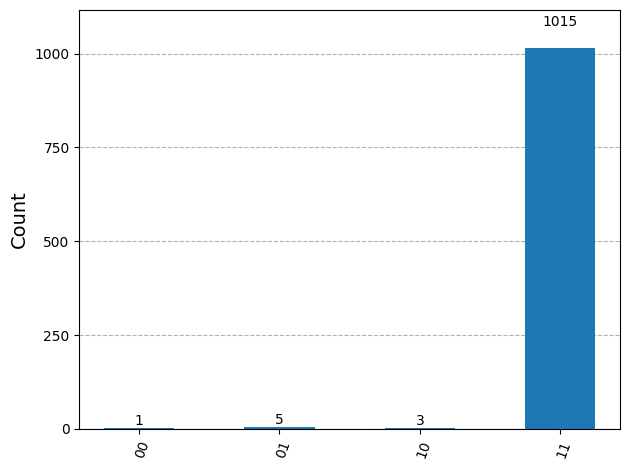

In [11]:
from qiskit_ibm_runtime import Sampler

sample_object = Sampler(mode = backend)

job = sample_object.run([superdense_circuit_transpiled], shots = 1024) #intialized to bell state of 11

result = job.result()

pub_result = result[0]

print(pub_result.data.c.get_counts())

plot_histogram(pub_result.data.c.get_counts())

We see that there is some noise present. Most of the qubits have been correctly identified as 11 although some have not.


## Futuristic Superdense coding for Words

In [ ]:
def word_to_binary(word):
    binary = ''.join(format(ord(c), '08b') for c in word)
    return binary 

def binary_to_word(binary_str):
    padded = binary_str.ljust((len(binary_str) + 7) // 8 * 8, '0')
    return ''.join(chr(int(padded[i:i+8], 2)) for i in range(0, len(padded), 8))

message = "A message"

binary_message = word_to_binary(message)

recieved_message_bits = ''

# AerSimulator:

backend = AerSimulator()

for i in range(0,len(binary_message),2):

    bit_a = binary_message[i]
    bit_b = binary_message[i+1]
    
    #a and b are the two bits here

    num = 2*int(bit_a) + int(bit_b)

    qubit_bell_00 = state_00.evolve(bell_circuit) #prepares an entagled bell 00 state for that superdense coding bit pair

    match num:
        case 0:
            #Do nothing to first qubit, just transport it. apply below circuit:

            transported_state = qubit_bell_00

        case 1:
            #for transporting 01 state, we apply Z gate to qubit 1

            z_gate_circuit = QuantumCircuit(2)

            z_gate_circuit.z(0)

            transported_state = qubit_bell_00.evolve(z_gate_circuit)

        case 2:
            #for transporting 10 state we apply X gate to qubit 1

            x_gate_circuit = QuantumCircuit(2)

            x_gate_circuit.x(0)

            transported_state = qubit_bell_00.evolve(x_gate_circuit)

        case 3:
            #for case 11 we apply iY = ZX to qubit 2

            zx_gate_circuit = QuantumCircuit(2)

            zx_gate_circuit.x(0)

            zx_gate_circuit.z(0)

            transported_state = qubit_bell_00.evolve(zx_gate_circuit)

    #decode message at final place

    superdense_circuit = QuantumCircuit(2,2) 

    superdense_circuit.initialize(transported_state.data, [0, 1])  #Initialised to 11 bell state when alice has to transmit 11

    superdense_circuit.cx(0,1)

    superdense_circuit.h(0)

    superdense_circuit.barrier(range(2))

    superdense_circuit.measure(range(2), range(2)) #make measurement

    superdense_circuit.draw('mpl')

    superdense_circuit_transpiled = transpile(superdense_circuit, backend)

    job_sim = backend.run(superdense_circuit_transpiled,shots = 1) # we physically can only run it once for a given superconducting pair

    result_sim = job_sim.result()

    counts = result_sim.get_counts()

    bitstring = list(counts.keys())[0] #we get '00' '01' '10' or '11'

    recieved_message_bits += bitstring

recieved_word = binary_to_word(recieved_message_bits)

print(recieved_word)



A message


We have successfully transported messages with superdense coding using AerSimulator. Now lets try Physically.

In [ ]:
def word_to_binary(word):
    binary = ''.join(format(ord(c), '08b') for c in word)
    return binary 

def binary_to_word(binary_str):
    padded = binary_str.ljust((len(binary_str) + 7) // 8 * 8, '0')
    return ''.join(chr(int(padded[i:i+8], 2)) for i in range(0, len(padded), 8))

message = "A message"

binary_message = word_to_binary(message)

recieved_message_bits = ''

#Physical logging:

service = QiskitRuntimeService() #loads saved credentials 

backend = service.least_busy(operational = True, min_num_qubits= 2)

print(f"Name = {backend.name}, Version = {backend.version}, Number of Qubits ={backend.num_qubits}")

for i in range(0,len(binary_message),2):

    bit_a = binary_message[i]
    bit_b = binary_message[i+1]
    
    #a and b are the two bits here

    num = 2*int(bit_a) + int(bit_b)

    qubit_bell_00 = state_00.evolve(bell_circuit) #prepares an entagled bell 00 state for that superdense coding bit pair

    match num:
        case 0:
            #Do nothing to first qubit, just transport it. apply below circuit:

            transported_state = qubit_bell_00

        case 1:
            #for transporting 01 state, we apply Z gate to qubit 1

            z_gate_circuit = QuantumCircuit(2)

            z_gate_circuit.z(0)

            transported_state = qubit_bell_00.evolve(z_gate_circuit)

        case 2:
            #for transporting 10 state we apply X gate to qubit 1

            x_gate_circuit = QuantumCircuit(2)

            x_gate_circuit.x(0)

            transported_state = qubit_bell_00.evolve(x_gate_circuit)

        case 3:
            #for case 11 we apply iY = ZX to qubit 2

            zx_gate_circuit = QuantumCircuit(2)

            zx_gate_circuit.x(0)

            zx_gate_circuit.z(0)

            transported_state = qubit_bell_00.evolve(zx_gate_circuit)


    #Decode message at final destination

    superdense_circuit = QuantumCircuit(2,2) 

    superdense_circuit.initialize(transported_state.data, [0, 1])  #Initialised to 11 bell state when alice has to transmit 11

    superdense_circuit.cx(0,1)

    superdense_circuit.h(0)

    superdense_circuit.barrier(range(2))

    superdense_circuit.measure(range(2), range(2)) #make measurement

    superdense_circuit.draw('mpl')

    superdense_circuit_transpiled = transpile(superdense_circuit, backend, optimization_level=2)

    sample_object = Sampler(mode = backend)

    job = sample_object.run([superdense_circuit_transpiled], shots = 1) #Can be run only ONCE in reality since after measurement superdense pair destroyed

    result = job.result()

    counts = result.get_counts()

    bitstring = list(counts.keys())[0]  # Only 1 key since 1 shot
    
    received_message_bits += bitstring

recieved_word = binary_to_word(recieved_message_bits)

print(recieved_word)

    
    

Now we simulate using a Noise AerSimulator

In [ ]:
from qiskit_aer.noise import NoiseModel

def word_to_binary(word):
    binary = ''.join(format(ord(c), '08b') for c in word)
    return binary 

def binary_to_word(binary_str):
    padded = binary_str.ljust((len(binary_str) + 7) // 8 * 8, '0')
    return ''.join(chr(int(padded[i:i+8], 2)) for i in range(0, len(padded), 8))

message = "A message"

binary_message = word_to_binary(message)

recieved_message_bits = ''

#Physical logging:

service = QiskitRuntimeService() #loads saved credentials 

backend = service.least_busy(operational = True, min_num_qubits= 2)


# AerSimulator with noise:

noise_model_sim = NoiseModel.from_backend(backend)

backend = AerSimulator(noise_model = noise_model_sim) #leaving empty gives ideal solution

for i in range(0,len(binary_message),2):

    bit_a = binary_message[i]
    bit_b = binary_message[i+1]
    
    #a and b are the two bits here

    num = 2*int(bit_a) + int(bit_b)

    qubit_bell_00 = state_00.evolve(bell_circuit) #prepares an entagled bell 00 state for that superdense coding bit pair

    match num:
        case 0:
            #Do nothing to first qubit, just transport it. apply below circuit:

            transported_state = qubit_bell_00

        case 1:
            #for transporting 01 state, we apply Z gate to qubit 1

            z_gate_circuit = QuantumCircuit(2)

            z_gate_circuit.z(0)

            transported_state = qubit_bell_00.evolve(z_gate_circuit)

        case 2:
            #for transporting 10 state we apply X gate to qubit 1

            x_gate_circuit = QuantumCircuit(2)

            x_gate_circuit.x(0)

            transported_state = qubit_bell_00.evolve(x_gate_circuit)

        case 3:
            #for case 11 we apply iY = ZX to qubit 2

            zx_gate_circuit = QuantumCircuit(2)

            zx_gate_circuit.x(0)

            zx_gate_circuit.z(0)

            transported_state = qubit_bell_00.evolve(zx_gate_circuit)

    #decode message at final place

    superdense_circuit = QuantumCircuit(2,2) 

    superdense_circuit.initialize(transported_state.data, [0, 1])  #Initialised to 11 bell state when alice has to transmit 11

    superdense_circuit.cx(0,1)

    superdense_circuit.h(0)

    superdense_circuit.barrier(range(2))

    superdense_circuit.measure(range(2), range(2)) #make measurement

    superdense_circuit.draw('mpl')

    superdense_circuit_transpiled = transpile(superdense_circuit, backend)

    job_sim = backend.run(superdense_circuit_transpiled,shots = 1) # we physically can only run it once for a given superconducting pair

    result_sim = job_sim.result()

    counts = result_sim.get_counts()

    bitstring = list(counts.keys())[0] #we get '00' '01' '10' or '11'

    recieved_message_bits += bitstring

recieved_word = binary_to_word(recieved_message_bits)

print(recieved_word)

C:\Users\shrid\AppData\Local\Temp\ipykernel_39676\2519170446.py:19: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService() #loads saved credentials


a mesSage


We can see the message is distorted because of noise simulated. yay.


Error mitigation with voting stuff:


In [26]:
from qiskit_aer.noise import NoiseModel

def word_to_binary(word):
    binary = ''.join(format(ord(c), '08b') for c in word)
    return binary 

def binary_to_word(binary_str):
    padded = binary_str.ljust((len(binary_str) + 7) // 8 * 8, '0')
    return ''.join(chr(int(padded[i:i+8], 2)) for i in range(0, len(padded), 8))

message = "A message"

binary_message = word_to_binary(message)

recieved_message_bits = ''

recieved_message_trials = []

#Physical logging:

service = QiskitRuntimeService() #loads saved credentials 

backend = service.least_busy(operational = True, min_num_qubits= 2)


# AerSimulator with noise:

noise_model_sim = NoiseModel.from_backend(backend)

backend = AerSimulator(noise_model = noise_model_sim) #leaving empty gives ideal solution

for j in range(10):

    for i in range(0,len(binary_message),2):

        bit_a = binary_message[i]
        bit_b = binary_message[i+1]
        
        #a and b are the two bits here

        num = 2*int(bit_a) + int(bit_b)

        qubit_bell_00 = state_00.evolve(bell_circuit) #prepares an entagled bell 00 state for that superdense coding bit pair

        match num:
            case 0:
                #Do nothing to first qubit, just transport it. apply below circuit:

                transported_state = qubit_bell_00

            case 1:
                #for transporting 01 state, we apply Z gate to qubit 1

                z_gate_circuit = QuantumCircuit(2)

                z_gate_circuit.z(0)

                transported_state = qubit_bell_00.evolve(z_gate_circuit)

            case 2:
                #for transporting 10 state we apply X gate to qubit 1

                x_gate_circuit = QuantumCircuit(2)

                x_gate_circuit.x(0)

                transported_state = qubit_bell_00.evolve(x_gate_circuit)

            case 3:
                #for case 11 we apply iY = ZX to qubit 2

                zx_gate_circuit = QuantumCircuit(2)

                zx_gate_circuit.x(0)

                zx_gate_circuit.z(0)

                transported_state = qubit_bell_00.evolve(zx_gate_circuit)

        #decode message at final place

        superdense_circuit = QuantumCircuit(2,2) 

        superdense_circuit.initialize(transported_state.data, [0, 1])  #Initialised to 11 bell state when alice has to transmit 11

        superdense_circuit.cx(0,1)

        superdense_circuit.h(0)

        superdense_circuit.barrier(range(2))

        superdense_circuit.measure(range(2), range(2)) #make measurement

        superdense_circuit.draw('mpl')

        superdense_circuit_transpiled = transpile(superdense_circuit, backend)

        job_sim = backend.run(superdense_circuit_transpiled,shots = 1) # we physically can only run it once for a given superconducting pair

        result_sim = job_sim.result()

        counts = result_sim.get_counts()

        bitstring = list(counts.keys())[0] #we get '00' '01' '10' or '11'

        recieved_message_bits += bitstring

    recieved_word = binary_to_word(recieved_message_bits)

    print(recieved_word)

    recieved_message_trials.append(recieved_word)

    recieved_word = ''

    recieved_message_bits = ''

from collections import Counter

def votin(L):
    
    winner = Counter(L).most_common(1)[0][0]

    return winner

final_message = ''

for j in range(len(recieved_message_trials[0])):

    candidates = []

    for word in recieved_message_trials:
        candidates.append(word[j])

    winner = votin(candidates)

    final_message += winner

print(f"Final message is: {final_message}")



C:\Users\shrid\AppData\Local\Temp\ipykernel_39676\1384528312.py:21: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService() #loads saved credentials


E masóage
A messege
 -esqcge
@$mdsw!gu
A Mescaçe
  meysage
A`messagd
A message
A messace
A llssagd
Final message is: A message


We can see that by sending the superdense bit mutiple times, 10 here, we can improve accuracy to almost certinity.